** This is a work in progress **
## Objective:
1.	Analysing the Titanic dataset to obtain useful and interesting insights.
2.	Predicting survival using multiple ML techniques
After poking around for inspiration from fellow kagglers, i noticed Random Forest Trees to be the go-to technique for prediction in this competition.. Having python at my disposal, i figured i am interested in attempting multiple ML techniques and hope to analyze how they fare.

## Step 1:  Import Libraries

In [1]:
# Data Analysis and Wrangling
import numpy as np 
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# allowing multiple scrollable outputs
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Step 2: Load Data
we create a combined dataframe - Full, to allow us perform operations both datasets require, without repetition.

In [2]:
# Load data
train = pd.read_csv('../input/train.csv')
test = pd.read_csv('../input/test.csv')

# To perform manipulation that both datasets need in common
full = train.append(test,ignore_index = True) 


## Step 3: Preliminary/Descriptive Analysis 
Now that we have our data ready, we can look at the variables, shape of the data, missing values and some standard descriptive stats. Further, we can figure out sensible data cleaning and possible feature extraction/engineering opportunities.


In [3]:
# preliminary analysis
print('Train:', train.shape, 'Test:', test.shape, "Full:", full.shape)
full.head()
full.isnull().sum()
full.describe()

Train: (891, 12) Test: (418, 11) Full: (1309, 12)


,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


* Train has 891 records, Test has 418 records (total: 1309), we will use Test to predict survival after building model(s).
* Missing values Age - 263 (~20%), Cabin - 1014 (~77%) , Embarked- 2, Fare 1. The missing values might be important in deciding the survival of a passenger, hence, the missingness has to be dealth with.
* Names have titles (Royalty, Mr, Master, Mrs and so on.) which might have some correlation with survival rates.

### Some initial data cleaning for better visualization to aid analysis

In [4]:
#filling unknown cabin with U
full.Cabin = train.Cabin.fillna('U')

#convert male,female to 0,1
full['Sex'].replace(["male","female"],[0,1],inplace= True)

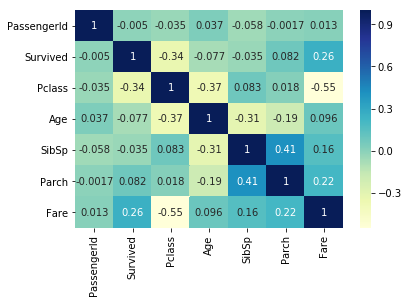

In [5]:
#deciding importance of variables
corr = train.corr()
sns.heatmap(corr, annot= True, cmap="YlGnBu")
